# Homework Lesson 2
Simon Tessier, name, name, name ...

In [1]:
import pandas as pd
import spacy

In [2]:
nlp = spacy.load("fr_core_news_sm") # loading a pretrained language model

In [46]:
df = pd.read_csv("fournisseurs_energie_top5_forums_clean.csv") # already clened version

In [47]:
df.columns

Index(['Unnamed: 0', 'titre', 'text', 'date_experience', 'note', 'fournisseur',
       'source'],
      dtype='object')

In [48]:
df.head()

,Unnamed: 0,titre,text,date_experience,note,fournisseur,source
0,0,Aucun soucis particulier,payer facture mois fonction consommation exact...,Date de l'expérience: 01 décembre 2022,4,https://fr.trustpilot.com/review/engie.fr,trustpilot
1,1,Engie facture a ses clients des sommes…,engie factur client somme exorbitant engie fac...,Date de l'expérience: 26 novembre 2022,1,https://fr.trustpilot.com/review/engie.fr,trustpilot
2,2,Facturation sur consommation d'un autre logement,facturer pdl logement dire faute ne jamais pre...,Date de l'expérience: 29 novembre 2022,1,https://fr.trustpilot.com/review/engie.fr,trustpilot
3,3,un service client ou il est dur de…,service client dur comprendre langue utiliser ...,Date de l'expérience: 29 novembre 2022,1,https://fr.trustpilot.com/review/engie.fr,trustpilot
4,4,Client d'ENGIE depuis longtemps toujours satis...,excellent expérience engie interlocuteur top …...,Date de l'expérience: 01 décembre 2022,5,https://fr.trustpilot.com/review/engie.fr,trustpilot


### I Data preparation

In [49]:
from unidecode import unidecode

def tokenize_lemm_func(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(lemmatized_tokens)  # Convert list to string

def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    
    # Remove punctuation by replacing it with spaces
    text = ''.join([' ' if c in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' else c for c in text])
    text = text.lower() # Convert to lowercase
    text = unidecode(text) # Normalize accents  
    
    return text

# Apply text cleaning
df["tokens"] = df["text"].apply(clean_text)

print("The dataset was cleaned!")
# Apply preprocessing to text column
df["tokens"] = df["tokens"].astype(str).apply(tokenize_lemm_func)
print(df["tokens"].head())



The dataset was cleaned!
0    payer facture mois fonction consommation exact...
1    engie factur client somme exorbiter engie fact...
2    facturer pdl logement faute jamais prendre abo...
3    service client dur comprendre langue utiliser ...
4    excellent experience engie interlocuteur top ....
Name: tokens, dtype: object


### II TF-IDF Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df["tokens"].astype(str).values  # Ensure corpus contains strings
# Initialize and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_)

{'payer': 10657, 'facture': 6092, 'mois': 9643, 'fonction': 6415, 'consommation': 3191, 'exact': 5860, 'electricite': 5067, 'factur': 6088, 'tombe': 14615, 'generalemer': 6794, 'fin': 6308, 'pil': 10935, 'constamment': 3200, 'semain': 13441, 'retard': 12939, 'paiement': 10413, 'mettre': 9474, 'part': 10556, 'sm': 13662, 'rappel': 12036, 'jamais': 8211, 'harceler': 7117, 'service': 13527, 'beneficier': 1591, 'pair': 10422, 'fois': 6407, 'etalement': 5709, 'besoin': 1613, 'client': 2619, 'ailleurs': 453, 'generalement': 6793, 'agreabl': 408, 'comprehensif': 2895, 'engie': 5346, 'somme': 13740, 'exorbiter': 5953, 'facturer': 6093, 'technicien': 14369, 'gaz': 6764, 'grdf': 6961, 'bien': 1647, 'preciser': 11326, 'logemer': 8798, 'resultat': 12922, 'course': 3516, 'euro': 5795, 'ouvrir': 10388, 'compteur': 2930, 'electriqu': 5071, 'intervenir': 8065, 'chaudiere': 2411, 'devoir': 4412, 'faire': 6116, 'savoir': 13335, 'prendre': 11381, 'argent': 989, 'tord': 14634, 'expliquer': 5997, 'malheure

In [55]:
# Check the dimensions of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")  # (num_docs, num_words)

TF-IDF Matrix Shape: (36234, 15530)


In [56]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense for easy inspection (only the first document)
tfidf_dense = tfidf_matrix.toarray()  # Convert to dense matrix (optional, only for small datasets)
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

# Show top 10 words with highest TF-IDF values in the first document
top_words = df_tfidf.iloc[0].sort_values(ascending=False).head(10)
print("Top words in first document:\n", top_words)


Top words in first document:
 generalemer     0.278560
paiement        0.275498
generalement    0.250236
pair            0.250236
pil             0.246262
etalement       0.230302
constamment     0.230302
exact           0.213443
payer           0.203363
fonction        0.184108
Name: 0, dtype: float64


**Two-Dimensional Document Visualization with t-SNE**

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.108s...
[t-SNE] Computed neighbors for 5000 samples in 8.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.921211
[t-SNE] KL divergence after 1000 iterations: 2.401162


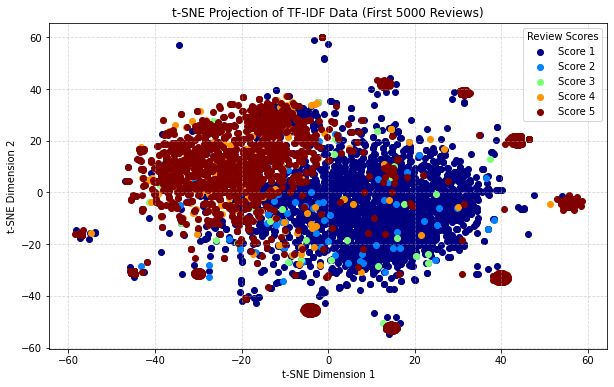

In [57]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Ensure the TF-IDF matrix is available
num_samples = 5000  # Number of documents to visualize

# Check if tfidf_matrix is in sparse format and convert if needed
if hasattr(tfidf_matrix, "toarray"):
    tfidf_dense = tfidf_matrix[:num_samples].toarray()
else:
    tfidf_dense = tfidf_matrix[:num_samples]

# Extract document labels (ratings)
document_labels = df["note"].values[:num_samples]

# Initialize t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=0, verbose=1)

# Apply t-SNE transformation
tsne_embedding = tsne_model.fit_transform(tfidf_dense)

# Define distinct colors for different review scores
unique_labels = np.unique(document_labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

# Plotting
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    indices = document_labels == label
    plt.scatter(tsne_embedding[indices, 0], tsne_embedding[indices, 1], color=colors[i], label=f"Score {label}")

plt.legend(title="Review Scores")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Projection of TF-IDF Data (First 5000 Reviews)")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


The clustering through t-SNE is done well, we can see that the 5-star and the 1-star reviews are clearly separated (the abundance of either 5 or 1 star review also tells us a lot about the tendance of customers to rate a product using one of the extremas or else we would see much more "neutral" reviews like 3 or 4 stars).

We can also see multiple clusters outside of the middle that seem to be very well defined by 5-star reviews, even though 1 or 2 of them in the upper half of the graph are mixed in with a few 1-star reviews which might correspond to either badly worded comments or also flaws in the TF-IDF method that classifies different reviews together because they contain the same words (for example: "I absolutely love this product from Totale" and "I absolutely don't love this product from Totale")

### III Train Word2Vec Model

In [74]:
df["tokens"] = df["tokens"].apply(lambda x: x.split())


In [76]:
df['tokens'].head()

0    [payer, facture, mois, fonction, consommation,...
1    [engie, factur, client, somme, exorbiter, engi...
2    [facturer, pdl, logement, faute, jamais, prend...
3    [service, client, dur, comprendre, langue, uti...
4    [excellent, experience, engie, interlocuteur, ...
Name: tokens, dtype: object

In [75]:
from gensim.models import Word2Vec

# Split texts into word lists for Word2Vec input
sentences = df["tokens"].tolist()
# Train Word2Vec model with skip-gram (sg=1)
model = Word2Vec(sentences, vector_size=256, window=5, min_count=1, sg=1)
word_vectors = model.wv


**Visualize Word Embeddings with t-SNE**

In [77]:
words = word_vectors.index_to_key[:200]  # First 200 words
vectors = np.array([word_vectors[word] for word in words])

tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)


**Plot Word2Vec Embeddings**

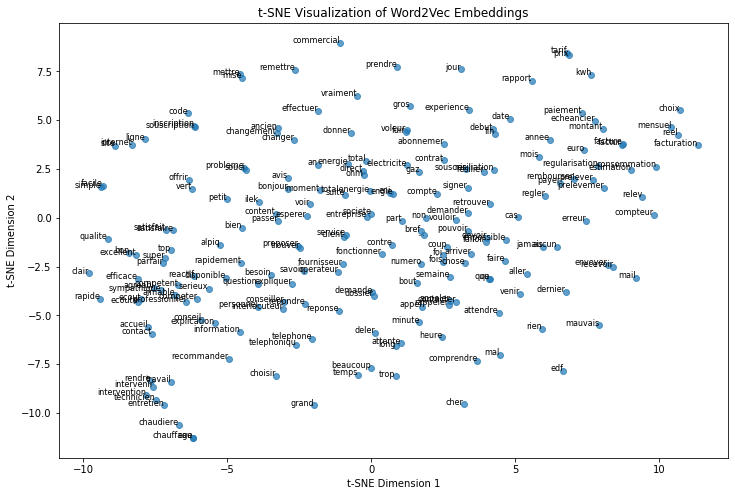

In [78]:
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8, ha='right')

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


### IV Creating Sentence Vectors

In [79]:
import numpy as np

def get_sentence_vector(tokens, model, vectorizer):
    word_vectors = model.wv
    word_tfidf = vectorizer.transform([" ".join(tokens)]).toarray().flatten()  # Get TF-IDF scores
    
    valid_vectors = []
    weights = []
    
    for word in tokens:
        if word in word_vectors and word in vectorizer.vocabulary_:
            word_vec = word_vectors[word]
            weight = word_tfidf[vectorizer.vocabulary_[word]]  # Get TF-IDF weight
            valid_vectors.append(word_vec * weight)
            weights.append(weight)
    
    if valid_vectors:
        return np.sum(valid_vectors, axis=0) / np.sum(weights)  # Weighted average
    else:
        return np.zeros(model.vector_size)  # Return zero vector if empty

df["sentence_vector"] = df["tokens"].apply(lambda tokens: get_sentence_vector(tokens, model, vectorizer))


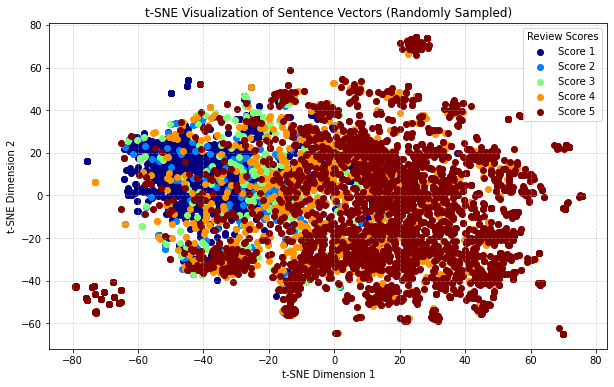

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Randomly sample 1000 documents for visualization
num_samples = min(5000, len(df))
random_indices = np.random.choice(len(df), num_samples, replace=False)

# Extract the corresponding sentence vectors and labels
sentence_vectors = np.stack(df["sentence_vector"].iloc[random_indices])  # Convert list to NumPy array
document_labels = df["note"].iloc[random_indices] if "note" in df.columns else np.zeros(num_samples)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_embedding = tsne_model.fit_transform(sentence_vectors)

# Define distinct colors for different review scores
unique_labels = np.unique(document_labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    indices = document_labels == label
    plt.scatter(tsne_embedding[indices, 0], tsne_embedding[indices, 1], color=colors[i], label=f"Score {label}")

plt.legend(title="Review Scores")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Sentence Vectors (Randomly Sampled)")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


The clustering seems to be working indeed. But it is hard to tell whether the separation through t-SNE with Word2Vec is that much better than with the TF-IDF method

At least, we get a more or less proper gradient this time, unlike with TF-IDF there is some logic in the clustering. In the big cluster in the middle, the left concentrates poor reviews, while the right side represents the perfect reviews, and we shift from dark blue, through light blue, light green and orange into dark red as we move along to the right.

Just like with TF-IDF we also see multiple clusters of 5-star reviews aggregated outside of the main clusters, they seem to be near-perfectly put together and it would be interesting to investigate them closer to find what unites them.